In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

os.chdir("/content/drive/My Drive/Colab Notebooks/SML_Project")
!ls

ConvN_MNIST.ipynb  copy_mnist_gesture.ipynb  Data  mnist_gesture.ipynb


# **Data Reading**

In [3]:
PATH = "./Data/MNIST/"

def ReadData():
    train = []
    train_labels = []
    test = []
    test_labels = []

    with open(PATH + 'sign_mnist_train.csv', 'r') as csvFile:
        reader = csv.reader(csvFile)
        count = 0
        for row in reader:
            if count == 0:
                count += 1
                continue
            train_labels.append(row.pop(0))
            train.append(row)
    csvFile.close()

    with open(PATH + 'sign_mnist_test.csv', 'r') as csvFile:
        reader = csv.reader(csvFile)
        count = 0
        for row in reader:
            if count == 0:
                count += 1
                continue
            test_labels.append(row.pop(0))
            test.append(row)
    csvFile.close()

    train = np.asarray(train, dtype=np.uint8)
    train_labels = np.asarray(train_labels)

    test = np.asarray(test, dtype=np.uint8)
    test_labels = np.asarray(test_labels)
    print("Train shape: {}".format(train.shape))
    print("Train Labels shape: {}".format(train_labels.shape))

    print("Test shape: {}".format(test.shape))
    print("Test Labels shape: {}".format(test_labels.shape))

    print("Classes: {}".format(np.unique(train_labels).shape))

    return train, train_labels, test, test_labels



# X_Train, Y_Train, X_Test, Y_Test = ReadData()

# np.save(PATH + "X_Train.npy", X_Train)
# np.save(PATH + "Y_Train.npy", Y_Train)
# np.save(PATH + "X_Test.npy", X_Test)
# np.save(PATH + "Y_Test.npy", Y_Test)

X_Train = np.load(PATH + "X_Train.npy")
Y_Train = np.load(PATH + "Y_Train.npy")
X_Test = np.load(PATH + "X_Test.npy")
Y_Test = np.load(PATH + "Y_Test.npy")

print("[+] Data Reading done")

[+] Data Reading done


# **Data Visualization**

In [0]:
def Visualize(x_data, n_images=5):
    for i in range(n_images):
        image = np.reshape(x_data[i], (28, 28))
        cv2.imwrite(PATH + "temp_" + str(i) + ".png", image)


# Visualize(X_Train)

# **Pre-Processing**

In [5]:
print("[+] PreProcessing...")



print("[+] PreProcessing Done")

[+] PreProcessing...
[+] PreProcessing Done


# **Feature Extraction**

In [17]:
print("[+] Features Extraction...")
# Sift Features
def SiftFeatures(x_data, y_data):
    sift = cv2.xfeatures2d.SIFT_create()
    features = []
    labels = []

    for i in range(x_data.shape[0]):
        image = np.reshape(x_data[i], (28, 28))
        _, des = sift.detectAndCompute(image, None)
        if des is None:
            continue
        for d in des:
            features.append(d)
        labels.append(y_data[i])

    features = np.asarray(features)
    labels = np.asarray(labels)

    print("Features shape: {}".format(features.shape))
    print("Labels shape: {}".format(labels.shape))
    return features, labels

def Hog(x_data, y_data, n_images=5):
    features = []
    for i in range(x_data.shape[0]):
        image = np.reshape(x_data[i], (28, 28))
        fd, hog_image = hog(image, orientations=12, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2-Hys", visualize=True)
        if i < n_images:
            cv2.imwrite(PATH + "hog_" + str(i) + ".png", hog_image)
        features.append(fd)
    features = np.asarray(features)

    print("Features shape: {}".format(features.shape))
    return features, y_data


# NX_Train,  NY_Train = SiftFeatures(X_Train, Y_Train)
# NX_Train,  NY_Train = Hog(X_Train, Y_Train)
# NX_Test,  NY_Test = Hog(X_Test, Y_Test)


NX_Train = np.load(PATH + "NX_Train.npy")
NY_Train = np.load(PATH + "NY_Train.npy")
NX_Test = np.load(PATH + "NX_Test.npy")
NY_Test = np.load(PATH + "NY_Test.npy")


print("[+] Features Extraction Done")

[+] Features Extraction...
[+] Features Extraction Done


In [0]:
np.save(PATH + "NX_Train.npy", NX_Train)
np.save(PATH + "NY_Train.npy", NY_Train)
np.save(PATH + "NX_Test.npy", NX_Test)
np.save(PATH + "NY_Test.npy", NY_Test)

# **Unsupervised Learning**

In [0]:

# print("[+] Unsupervised Learning[KMeans]...")

# kmeans = KMeans(n_clusters=100, n_jobs=-1)
# kmeans.fit(NX_Train)
# pickle.dump(kmeans, open(PATH + "Kmean.sav", 'wb'))

# # Creating Bag of Visual Words (Creating Vocaboulary)
# def Bovw(kmeans, x_data, y_data):
#     sift = cv2.xfeatures2d.SIFT_create()
#     features = []
#     labels = []

#     for i in range(x_data.shape[0]):
#         image = np.reshape(x_data[i], (28, 28))
#         histogram = np.zeros(len(kmeans.cluster_centers_))
#         kp, des = sift.detectAndCompute(image, None)
#         if des is None:
#             continue
#         nkp = np.size(kp)
#         labels.append(y_data[i])
#         for d in des:
#             idx = kmeans.predict(np.reshape(d, (1, d.shape[0])))
#             histogram[idx] += 1 / nkp

#         features.append(histogram)

#     features = np.asarray(features)
#     labels = np.asarray(labels)

#     print("Features shape: {}".format(features.shape))
#     print("Labels shape: {}".format(labels.shape))
#     return features, labels

# NX_Train, NY_Train = Bovw(kmeans, X_Train, Y_Train)
# NX_Test, NY_Test = Bovw(kmeans, X_Test, Y_Test)



# # np.save(PATH + "NX_Train.npy", NX_Train)
# # np.save(PATH + "NY_Train.npy", NY_Train)
# # np.save(PATH + "X_Test.npy", X_Train)
# # np.save(PATH + "Y_Test.npy", Y_Train)

# # NX_Train = np.load(PATH + "NX_Train.npy")
# # NY_Train = np.load(PATH + "NY_Train.npy")
# # X_Test = np.load(PATH + "X_Test.npy")
# # Y_Test = np.load(PATH + "Y_Test.npy")

# print("[+] Unsupervised Learning[KMeans] Done")



# **Analysis**

In [18]:
NX_Train = np.load(PATH + "NX_Train.npy")
NY_Train = np.load(PATH + "NY_Train.npy")
NX_Test = np.load(PATH + "NX_Test.npy")
NY_Test = np.load(PATH + "NY_Test.npy")

print("Train data shape: {}".format(NX_Train.shape))
print("Train data labels shape: {}".format(NY_Train.shape))
print("Test data shape: {}".format(NX_Test.shape))
print("Test data labels shape: {}".format(NY_Test.shape))

#LDA only
# lda = LDA(n_components = 20) 

# NX_Train = lda.fit_transform(NX_Train, NY_Train)  
# NX_Test = lda.transform(NX_Test)

# print("Train data shape after LDA: {}".format(NX_Train.shape))
# print("Test data shape after LDA: {}".format(NX_Test.shape))

#PCA only
pca = PCA(n_components = 100)  
NX_Train_pca = pca.fit_transform(NX_Train)  
NX_Test_pca = pca.transform(NX_Test) 
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)


#LDA after PCA
# lda = LDA(n_components = 20) 

# NX_Train = lda.fit_transform(NX_Train, NY_Train)  
# NX_Test = lda.transform(NX_Test)

# print("Train data shape after PCA: {}".format(NX_Train.shape))
# print("Test data shape after PCA: {}".format(NX_Test.shape))

# TODO: [1] PCA, [2] LDA, [3] PCA then LDA, [4] LDA then PCA


Train data shape: (27455, 192)
Train data labels shape: (27455,)
Test data shape: (7172, 192)
Test data labels shape: (7172,)


# **Training SVM**

In [0]:
print("[+] Training SVM ...")

clf = svm.SVC(gamma='auto', kernel="rbf")
clf.fit(NX_Train, NY_Train)

print("[+] Training SVM done")

[+] Training SVM ...
[+] Training SVM done


# **Predict SVM**

In [0]:
print("[+] Testing SVM...")

Accuracy = clf.score(NX_Train, NY_Train)
print("[SVM]Accuracy[Train]:", Accuracy*100)
Accuracy = clf.score(NX_Test, NY_Test)
print("[SVM]Accuracy[Test]:", Accuracy*100)

print("[+] Testing SVM Done")

[+] Testing SVM...
[SVM]Accuracy[Train]: 84.70952467674377
[SVM]Accuracy[Test]: 73.43837144450642
[+] Testing SVM Done


# **Training Random Forest Classifier**

In [0]:

print("[+] Random Forest Classifier...")

clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(NX_Train, NY_Train)


[+] Random Forest Classifier...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# **Testing Random Forest Classifier**

In [0]:

Accuracy = clf.score(NX_Train, NY_Train)
print("[RFC]Accuracy[Train]:", Accuracy*100)

Accuracy = clf.score(NX_Test, NY_Test)
print("[RFC]Accuracy[Test]:", Accuracy*100)

print("[+] Random Forest Classifier done")

[RFC]Accuracy[Train]: 100.0
[RFC]Accuracy[Test]: 91.67596207473508
[+] Random Forest Classifier done


# **Training Logistic Regression Classifier**

In [0]:
from sklearn.linear_model import LogisticRegression
print("[+]  Logistic Regression Classifier...")
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(NX_Train, NY_Train)

[+]  Logistic Regression Classifier...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# **Testing LR Classifier**

In [0]:
Accuracy = clf.score(NX_Train, NY_Train)
print("[LRC]Accuracy[Train]:", Accuracy*100)

Accuracy = clf.score(NX_Test, NY_Test)
print("[LRC]Accuracy[Test]:", Accuracy*100)

print("[+] Random Forest Classifier done")

[LRC]Accuracy[Train]: 94.50737570570024
[LRC]Accuracy[Test]: 77.76073619631902
[+] Random Forest Classifier done


# **Training GNB Classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(NX_Train, NY_Train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Testing GNB Classifier**

In [0]:
Accuracy = clf.score(NX_Train, NY_Train)
print("[GNB]Accuracy[Train]:", Accuracy*100)

Accuracy = clf.score(NX_Test, NY_Test)
print("[GNB]Accuracy[Test]:", Accuracy*100)

print("[+] GNB Classifier done")

[GNB]Accuracy[Train]: 90.12201784738664
[GNB]Accuracy[Test]: 78.20691578360291
[+] GNB Classifier done


# **TSNE**

In [0]:

from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
# ts = tsne.fit_transform(NX_Train)
unique_labels = np.unique(NY_Train[:1])
target_ids = range(len(unique_labels))

# plt.figure(figsize=(6, 5))
# colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple', "#800000","#9A6324","#808000","#469990","#000075","#bfef45","#f032e6","#a9a9a9","#fabebe","#ffd8b1","#fffac8","#e6beff"
# for i, label in zip(target_ids, unique_labels):
#     plt.scatter(NX_Train[NY_Train == i, 0], NX_Train[NY_Train == i, 1], label=label)
# plt.legend()
# plt.show()

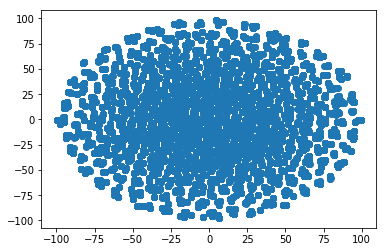

In [19]:
X_embedded = TSNE(n_components=2).fit_transform(NX_Train)
X_embedded.shape
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

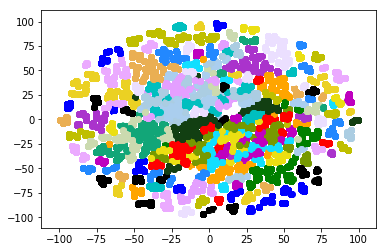

In [33]:
# plt.scatter(X_embedded[:,0], NY_Train[:], c=NY_Train, cmap=plt.cm.get_cmap("jet", 10))
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
# plt.show()

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple',
		'#e49fff', '#ebdfff', '#12dfff', '#ebdf12', '#ebaaff', '#eaaf53', '#ebd123', '#abcde2', '#779900', '#2288ff',
'#aaceee', '#cbdaaf', '#12a678', '#123f12', '#aa33cc', '#cbae25', '#eaa321', '#ffcde5', '#224400', '#2222aa']

import matplotlib.pyplot as plt
for i in range(len(X_embedded)):
    
    plt.scatter(X_embedded[i][0], X_embedded[i][1], c = colors[int(NY_Train[i])])

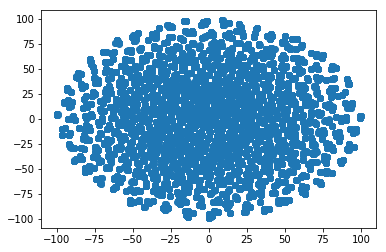

In [34]:
X_embedded_pca = TSNE(n_components=2).fit_transform(NX_Train_pca)
X_embedded_pca.shape
import matplotlib.pyplot as plt
plt.scatter(X_embedded_pca[:, 0], X_embedded_pca[:, 1])

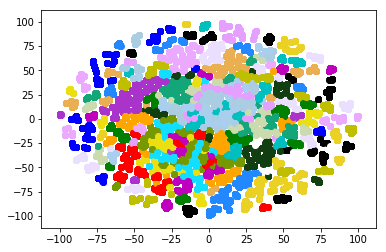

In [35]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple',
		'#e49fff', '#ebdfff', '#12dfff', '#ebdf12', '#ebaaff', '#eaaf53', '#ebd123', '#abcde2', '#779900', '#2288ff',
'#aaceee', '#cbdaaf', '#12a678', '#123f12', '#aa33cc', '#cbae25', '#eaa321', '#ffcde5', '#224400', '#2222aa']

import matplotlib.pyplot as plt
for i in range(len(X_embedded_pca)):
    
    plt.scatter(X_embedded_pca[i][0], X_embedded_pca[i][1], c = colors[int(NY_Train[i])])